# <font color='green'>Limpeza e tratamento de dados com Pandas</font>

1. Conhecendo os dados  
  1.1 Carregando os dados  
  1.2 Normalizando todas as colunas de uma vez  
2. Transformação inicial dos dados  
  2.1 _Casting_ de colunas  
  2.2 Tratando _strings_ vazias  
3. Dados duplicados e nulos  
  3.1 Identificando amostras duplicadas  
  3.2 Identificando dados nulos  
  3.3 Substituindo dados nulos  
  3.4 Removendo dados nulos  
4. Lidando com _outliers_  
  4.1 Identificando _outliers_  
  4.2 Substituindo _outliers_  
  4.3 Removendo _outliers_  
5. Variáveis categóricas  
  5.1 Removendo dados  
  5.2 Substituindo valores - Variáveis categóricas binárias  
  5.3 Variáveis categóricas nominais - _One Hot Encoder (Dummy)_

## 1 Conhecendo os dados

### Situação problema

Faremos a limpeza de uma base de dados com o _churn_ de uma empresa de telecomunicações, com o objetivo de (posteriormente) construir um modelo de _Machine Learning_. Esse modelo terá o objetivo de prever se um determinado cliente deixará de consumir os produtos/serviços da empresa.


#### Modelos de _machine learning_

Modelos de _machine learning_ são um tipo de tecnologia que permite que computadores aprendam a realizar tarefas específicas sem serem explicitamente programados para isso. Esses modelos são criados por meio de algoritmos que analisam dados e identificam padrões para criar uma representação matemática da relação entre os dados de entrada e de saída.

Para entender melhor, imagine que você quer criar um modelo para prever se uma pessoa vai gostar ou não de um filme baseado em características, como: gênero, elenco, sinopse, diretor(a), etc. Você começa alimentando o modelo com um conjunto de dados que contém informações sobre os filmes e as avaliações das pessoas. O modelo usa esses dados para encontrar padrões e criar uma equação matemática que pode ser usada para prever se uma pessoa vai gostar ou não de um determinado filme.

Outro exemplo de modelo de _machine learning_ é a recomendação de produtos em sites de compras online como a Amazon. O modelo recebe dados de compra e histórico de navegação da pessoa usuária e usa esses dados para recomendar produtos que a pessoa pode gostar.

Os modelos de _Machine Learning_ são amplamente utilizados em diversas áreas, como: detecção de fraudes em transações financeiras, reconhecimento de voz e imagem, diagnóstico médico, entre outros. Eles são capazes de realizar tarefas complexas de forma muito mais rápida e eficiente e têm a capacidade de aprender e melhorar continuamente com o tempo, tornando-se cada vez mais precisos e confiáveis.

#### _Churn_

O termo _churn_ é amplamente utilizado no mundo dos negócios e se refere à situação em que as pessoas deixam de fazer negócios com uma empresa, ou seja, se refere à taxa de cancelamento de clientes em um determinado período de tempo. Em outras palavras, é a porcentagem de clientes que deixam de usar um produto/serviço em um determinado período.

- Ocorre quando clientes deixam de **fazer negócios** com uma empresa
- Representa a **perda de receita**
- Pode ser um **indicador de satisfação** de clientes em relação aos **produtos/serviços**.

Como cientistas de dados, sabemos que o _churn_ está diretamente relacionado à receita da empresa, já que quanto mais clientes deixam de fazer negócios, mais dinheiro a empresa perde.

O _Churn_ é importante por ser um indicador da saúde financeira e do desempenho de uma empresa. Uma taxa alta de _Churn_ pode significar que a empresa está perdendo clientes mais rapidamente do que está adquirindo novos, o que pode ser um sinal de problemas com o produto/serviço oferecido, com a experiência do cliente ou com a concorrência.

Por outro lado, o _churn_ pode ser utilizado como um indicador de satisfação do cliente, uma taxa baixa de _Churn_ pode indicar que a empresa está retendo clientes e oferecendo um bom produto/serviço. É importante monitorar a taxa de _Churn_ e trabalhar para mantê-la o mais baixa possível, a fim de garantir a satisfação e fidelidade dos clientes.

Por isso, as empresas buscam alternativas para baixar o _churn_, oferecendo serviços de maior qualidade, suporte mais rápido e com melhor qualidade, criando programas de fidelidade, entre outras estratégias.

A importância de desenvolver um modelo de machine learning capaz de prever o Churn é que isso pode ajudar as empresas a identificar clientes que estão em risco de cancelar o serviço ou produto. Através de um modelo de machine learning, a empresa pode analisar dados históricos de clientes, compreendendo melhor as causas do Churn e, com base nessas informações, tomar medidas proativas para reter essas pessoas, como: oferecer descontos, melhorar o serviço ou enviar ofertas personalizadas.

### Carregando os dados

In [1]:
import pandas as pd

url = 'https://caelum-online-public.s3.amazonaws.com/2929-pandas/dataset-telecon.json'
df = pd.read_json(url)
print(df.shape)
df.head()

(7344, 6)


,id_cliente,Churn,cliente,telefone,internet,conta
0,0002-ORFBO,nao,"{'genero': 'feminino', 'idoso': 0, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': None, 'faturamente_eletronico': N..."
1,0003-MKNFE,nao,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': 'mes a mes', 'faturamente_eletron..."
2,0004-TLHLJ,sim,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
3,0011-IGKFF,sim,"{'genero': 'masculino', 'idoso': 1, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
4,0013-EXCHZ,sim,"{'genero': 'feminino', 'idoso': 1, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."


In [2]:
df.conta[1] # verifica uma linha da coluna 'conta'

{'contrato': 'mes a mes',
 'faturamente_eletronico': 'nao',
 'metodo_pagamento': 'cheque pelo correio',
 'cobranca': {'mensal': 59.9, 'Total': '542.4'}}

In [3]:
pd.json_normalize(df.conta).head(3) # normaliza dados aninhados de UMA UNICA coluna

,contrato,faturamente_eletronico,metodo_pagamento,cobranca.mensal,cobranca.Total
0,None,None,None,NaN,None
1,mes a mes,nao,cheque pelo correio,59.9,542.4
2,mes a mes,sim,cheque eletronico,73.9,280.85


In [4]:
pd.json_normalize(df.cliente).head(3)

,genero,idoso,parceiro,dependentes,tempo_servico
0,feminino,0,sim,sim,9.0
1,masculino,0,nao,nao,9.0
2,masculino,0,nao,nao,4.0


### Normalizando todas as colunas de uma vez

In [5]:
import json

# with open('path-for-local-file.json') as f:
#     json_bruto = json.load(f)

In [6]:
from urllib.request import urlopen

response   = urlopen(url)
json_bruto = json.loads(response.read())
print(type(json_bruto))
print(len(json_bruto))

<class 'list'>
7344


In [7]:
print(type(json_bruto[0]))
print(len(json_bruto[0]))
json_bruto[0]

<class 'dict'>
6


{'id_cliente': '0002-ORFBO',
 'Churn': 'nao',
 'cliente': {'genero': 'feminino',
  'idoso': 0,
  'parceiro': 'sim',
  'dependentes': 'sim',
  'tempo_servico': 9},
 'telefone': {'servico_telefone': 'sim', 'varias_linhas': 'nao'},
 'internet': {'servico_internet': 'DSL',
  'seguranca_online': 'nao',
  'backup_online': 'sim',
  'protecao_dispositivo': 'nao',
  'suporte_tecnico': 'sim',
  'tv_streaming': 'sim',
  'filmes_streaming': 'nao'},
 'conta': {'contrato': None,
  'faturamente_eletronico': None,
  'metodo_pagamento': None,
  'cobranca': {'mensal': None, 'Total': None}}}

In [8]:
df = pd.json_normalize(data=json_bruto, sep='_') # normaliza todas as colunas com JSONs aninhados de uma so vez
print(df.shape)
df.head()

(7344, 21)


,id_cliente,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,None
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.4


In [9]:
df.columns = df.columns.str.lower()
df.rename(columns={"conta_faturamente_eletronico": "conta_faturamento_eletronico"}, inplace=True)
df.columns

Index(['id_cliente', 'churn', 'cliente_genero', 'cliente_idoso',
       'cliente_parceiro', 'cliente_dependentes', 'cliente_tempo_servico',
       'telefone_servico_telefone', 'telefone_varias_linhas',
       'internet_servico_internet', 'internet_seguranca_online',
       'internet_backup_online', 'internet_protecao_dispositivo',
       'internet_suporte_tecnico', 'internet_tv_streaming',
       'internet_filmes_streaming', 'conta_contrato',
       'conta_faturamento_eletronico', 'conta_metodo_pagamento',
       'conta_cobranca_mensal', 'conta_cobranca_total'],
      dtype='object')

#### Parâmetros do _json_normalize()_

O método _json_normalize()_ é usado para normalizar dados JSON em um formato tabular (como um DataFrame do Pandas) para facilitar a análise e manipulação. Os parâmetros mais importantes do método _json_normalize()_ são:

- `data`: o objeto JSON a ser normalizado.
- `record_path`: um caminho para acessar o array de registros dentro do objeto JSON.
- `meta`: uma lista de colunas adicionais a serem incluídas no DataFrame, além das colunas normalizadas.
- `errors`: como lidar com erros de normalização. Os valores possíveis são `"raise"` (lançar um erro), `"ignore"` (ignorar o erro).
- `sep`: separador de colunas usado para concatenar as chaves do objeto JSON aninhado. O padrão é `"."`.

Aqui está um exemplo de como usar o método _json_normalize()_ com alguns dos parâmetros mencionados acima:

```python
import pandas as pd

data = {
    "empresa": "alura",
    "funcionarios": [
        {"nome": "Alice", "endereço": {"cidade": "São Paulo", "estado": "SP"}},
        {"nome": "Bob", "endereço": {"cidade": "Rio de Janeiro", "estado": "RJ"}}
    ]
}

df = pd.json_normalize(data, record_path="funcionarios", meta="empresa", errors="ignore", sep="_")
```

**Saída:**

&#160;|nome|endereço_cidade|endereço_estado|empresa
-|-|-|-|-
0|Alice|São Paulo|SP|alura
1|Bob|Rio de Janeiro|RJ|alura

Este código em Python faz uso das bibliotecas Pandas para criar um DataFrame que contém informações sobre pessoas associadas a uma empresa.

O objeto data contém uma chave `"empresa"` com o valor `"alura"`, bem como uma chave `"funcionarios"` cujo valor é uma lista contendo dois dicionários. Cada dicionário na lista representa uma pessoa, com informações sobre o nome e o endereço. O endereço é um dicionário aninhado com as chaves `"cidade"` e `"estado"`.

A função `pd.json_normalize()` é usada para normalizar os dados em uma tabela. Nesse caso, `data` é passado como o objeto JSON a ser normalizado. O parâmetro `record_path` é definido como `'funcionarios'` para indicar que os dados das pessoas devem ser normalizados. O parâmetro `meta` é definido como `"empresa"` para incluir a informação da empresa em cada linha da tabela. Finalmente, o parâmetro `errors` é definido como `'ignore'` para ignorar quaisquer erros que possam ocorrer durante a normalização e `sep` recebe o caracter `'_'`.

A saída do código é um objeto DataFrame que contém informações sobre as pessoas associadas à empresa, com cada pessoa representada em uma linha e as informações de nome, cidade e estado em colunas separadas.

## 2 Transformação inicial dos dados

### Dicionário de dados

#### Cliente

- `genero`: gênero (masculino e feminino)
- `idoso`: informação sobre um(a) cliente ter ou não idade igual ou maior que 65 anos
- `parceiro`: se o(a) cliente possui ou não um(a) parceiro ou parceira
- `dependentes`: se o(a) cliente possui ou não dependentes
- `tempo_servico`: meses de contrato do(a) cliente

#### Serviço de telefonia

- `servico_telefone`: assinatura de serviço telefônico
- `varias_linhas`: assinatura de mais de uma linha de telefone

#### Serviço de internet

- `servico_internet`: assinatura de um provedor internet
- `seguranca_online`: assinatura adicional de segurança online
- `backup_online`: assinatura adicional de backup online
- `protecao_dispositivo`: assinatura adicional de proteção no dispositivo
- `suporte_tecnico`: assinatura adicional de suporte técnico, menos tempo de espera
- `tv_streaming`: assinatura de TV a cabo
- `filmes_streaming`: assinatura de streaming de filmes

#### Conta

- `contrato`: tipo de contrato
- `faturamente_eletronico`: se o(a) cliente prefere receber a fatura online
- `metodo_pagamento`: forma de pagamento
- `cobranca_mensal`: total de todos os serviços do(a) cliente por mês
- `cobranca_Total`: total gasto pelo(a) cliente

### _Casting_ de colunas

Vamos verificar os tipos das colunas e fazer os devidos _castings_.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   churn                          7344 non-null   object 
 2   cliente_genero                 7344 non-null   object 
 3   cliente_idoso                  7344 non-null   int64  
 4   cliente_parceiro               7344 non-null   object 
 5   cliente_dependentes            7344 non-null   object 
 6   cliente_tempo_servico          7336 non-null   float64
 7   telefone_servico_telefone      7344 non-null   object 
 8   telefone_varias_linhas         7344 non-null   object 
 9   internet_servico_internet      7344 non-null   object 
 10  internet_seguranca_online      7344 non-null   object 
 11  internet_backup_online         7344 non-null   object 
 12  internet_protecao_dispositivo  7344 non-null   o

In [11]:
# df[['cliente_tempo_servico', 'conta_contrato', 'conta_cobranca_mensal', 'conta_cobranca_total']].astype(float)

# df.conta_cobranca_total.astype(float) # ValueError: could not convert string to float: ' '
# df.conta_contrato.astype(float) # ValueError: could not convert string to float: 'mes a mes'

In [12]:
df[df.conta_cobranca_total == ' '][
    ['cliente_tempo_servico', 'conta_contrato', 'conta_cobranca_mensal', 'conta_cobranca_total']
]

,cliente_tempo_servico,conta_contrato,conta_cobranca_mensal,conta_cobranca_total
975,0.0,dois anos,56.05,
1775,0.0,dois anos,20.00,
1955,0.0,dois anos,61.90,
2075,0.0,dois anos,19.70,
2232,0.0,dois anos,20.25,
2308,0.0,dois anos,25.35,
2930,0.0,dois anos,73.35,
3134,0.0,dois anos,25.75,
3203,0.0,dois anos,52.55,
4169,0.0,dois anos,80.85,


Note que ao selecionar as linhas com a _string_ espaço na coluna `'conta_cobranca_total`, verificamos que:

- todos os resultados se referem a clientes com tempo de serviço zerado (provavelmente cancelaram o serviço antes de iniciar a utilização); e
- o tempo de contrato é de `'dois anos'`, ou 24 meses.

O instrutor do curso preencheu a coluna `'conta_cobranca_total` nessas linhas com o valor da coluna `'conta_cobranca_mensal` multiplicado por 24 (meses em "dois anos" de contrato) e substituiu os valores da coluna `'cliente_tempo_servico'` por 24. Mas acredito que o mais adequado aqui é preencher a coluna `'conta_cobranca_total com o valor zero, pois parece que esses clientes nem começaram a utilização dos produtos/serviços.

Se excluirmos as linhas acima na seleção, conseguimos converter a coluna para `float` e ao procurar pelo menor valor veremos que o resultado é maior que zero. Portanto, me parece que existe algum problema no preenchimento da base de dados nessa situação em que os clientes "são clientes" por zero meses.

In [13]:
df[df.conta_cobranca_total != ' ']['conta_cobranca_total'].astype(float).min() # menor valor

18.8

In [14]:
df[df.conta_cobranca_total != ' ']['conta_cobranca_total'].astype(float).dropna().sort_values().head() # menores valores, apos remover NaN

2111    18.80
6542    18.85
6759    18.85
7058    18.90
7257    18.90
Name: conta_cobranca_total, dtype: float64

In [15]:
len(df[df.cliente_tempo_servico == 0]) # os mesmos onze resultados encontrados acima

11

Enfim, vamos preencher a coluna `'conta_cobranca_total'` nas linhas em que ela está vazia:

In [16]:
# seleciona indices da linhas que temos interesse
idx = df[df.conta_cobranca_total == ' '].index
idx

Int64Index([975, 1775, 1955, 2075, 2232, 2308, 2930, 3134, 3203, 4169, 5599], dtype='int64')

In [17]:
# # alteracoes propostas pelo instrutor
# df.loc[idx, "conta_cobranca_total"] = (df.loc[idx, "conta_cobranca_mensal"] * 24)
# df.loc[idx, "cliente_tempo_servico"] = 24

In [18]:
df.loc[idx, "conta_cobranca_total"] = '0'

In [19]:
# seleciono novamente as linhas que foram modificadas
df.loc[idx][
    ['cliente_tempo_servico', 'conta_contrato', 'conta_cobranca_mensal', 'conta_cobranca_total']
]

,cliente_tempo_servico,conta_contrato,conta_cobranca_mensal,conta_cobranca_total
975,0.0,dois anos,56.05,0
1775,0.0,dois anos,20.00,0
1955,0.0,dois anos,61.90,0
2075,0.0,dois anos,19.70,0
2232,0.0,dois anos,20.25,0
2308,0.0,dois anos,25.35,0
2930,0.0,dois anos,73.35,0
3134,0.0,dois anos,25.75,0
3203,0.0,dois anos,52.55,0
4169,0.0,dois anos,80.85,0


In [20]:
# finalmente, realiza casting
df['conta_cobranca_total'] = df.conta_cobranca_total.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   churn                          7344 non-null   object 
 2   cliente_genero                 7344 non-null   object 
 3   cliente_idoso                  7344 non-null   int64  
 4   cliente_parceiro               7344 non-null   object 
 5   cliente_dependentes            7344 non-null   object 
 6   cliente_tempo_servico          7336 non-null   float64
 7   telefone_servico_telefone      7344 non-null   object 
 8   telefone_varias_linhas         7344 non-null   object 
 9   internet_servico_internet      7344 non-null   object 
 10  internet_seguranca_online      7344 non-null   object 
 11  internet_backup_online         7344 non-null   object 
 12  internet_protecao_dispositivo  7344 non-null   o

#### Importância do _casting_

Fazer o cast das colunas para as tipagens corretas é importante antes de inserir em um modelo de machine learning por diversos motivos:

1. **Precisão dos resultados:** Ao fazer o cast das colunas para suas tipagens corretas, garantimos que os dados estejam representados de forma precisa e sem perda de informações. Por exemplo, se uma coluna contém números decimais e for representada como um tipo de dado inteiro, a precisão será perdida, o que pode levar a resultados incorretos no modelo de machine learning.
2. **Velocidade de processamento:** Quando os dados são armazenados em seu tipo de dado correto, o processamento dos dados é mais rápido. Por exemplo, o uso de floats de menor precisão como `float32` em vez de `float64` pode reduzir a carga computacional em operações de ponto flutuante já que exigem menos cálculos e até mesmo reduz o armazenamento.
3. **Compatibilidade do modelo:** Modelos de machine learning podem ter requisitos específicos em relação aos tipos de dados que podem ser usados como entrada. Portanto, fazer o cast das colunas para as tipagens corretas garante a compatibilidade do modelo.
4. **Evita erros:** Quando as colunas são convertidas para seus tipos corretos, erros de dados são menos propensos a ocorrer, porque, em machine learning, o modelo é treinado com base em padrões e relações identificadas nos dados de treinamento. Se os dados contêm erros, isso pode afetar a precisão do modelo e fazer com que ele produza resultados imprecisos.

Em resumo, fazer o cast das colunas para suas tipagens corretas é uma etapa importante na preparação dos dados para serem processados por um modelo de machine learning e pode ajudar a garantir que o modelo seja preciso e eficiente.

### Tratando _strings_ vazias

Vamos verificar os valores únicos em cada uma das colunas para identificar possíveis valores que devam ser tratados.

In [21]:
for col in df.columns[:3]:
    unique_values = df[col].unique()
    print(f"coluna:\t{col}\nlen:\t{len(unique_values)}\n\n{unique_values}\n{'-'*30}\n")

coluna:	id_cliente
len:	7267

['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------

coluna:	churn
len:	3

['nao' 'sim' '']
------------------------------

coluna:	cliente_genero
len:	2

['feminino' 'masculino']
------------------------------



Olhando para a coluna `'churn'` vemos que ela apresenta três valores únicos e um deles não faz sentido, o valor `''`, pois o cliente pode continuar como cliente (`'nao`) ou ter encerrado o contrato (`'sim'`).

Como essa coluna será o _target_ do modelo, ou seja, é a informação que tentaremos prever, não faz sentido manter nessa base linhas que não tenham essa informação. Portanto, vamos descatar essas linhas.

In [22]:
df_without_churn_info = df.query("churn == ''")
print(df_without_churn_info.shape)
df_without_churn_info.head(2)

(226, 21)


,id_cliente,churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamento_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_total
30,0047-ZHDTW,,feminino,0,nao,nao,11.0,sim,sim,fibra otica,...,nao,nao,nao,nao,nao,mes a mes,sim,transferencia bancaria (automatica),79.0,929.3
75,0120-YZLQA,,masculino,0,nao,nao,71.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,cartao de credito (automatico),19.9,1355.1


In [23]:
# outro_df = df[df.churn != ''].reset_index(drop=True).copy()
df = df[df.churn != ''].reset_index(drop=True)
print(df.shape)
df.head(2)

(7118, 21)


,id_cliente,churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamento_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,NaN
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.4


## 3 Dados duplicados e nulos

### Dados duplicados

> Amostras duplicadas são dados que possuem os mesmos valores em colunas correspondentes.

O Pandas já possui um método dedicado a encontrar linhas duplicadas em um DataFrame, o `pd.duplicated()` retorna uma Series _booleana_ indicando quais linhas esão duplicadas.

Como dados duplicados apresentam a mesma informação, não faz sentido manter as duplicidas, portanto, também devemos descartá-los. Podemos citar três motivos principais para a remoção das amostras duplicadas:

- **Viés do modelo:** se há amostras duplicadas no conjunto de dados, pode ser que o modelo de _machine learning_ dê mais importância para essas amostras repetidas.
- **Melhora do desempenho do modelo:** se inserimos amostras duplicadas, vão ser necessários mais cálculos e poder de processamento, além de ser um desperdício computacional trabalhar com amostras com o mesmo valor e que transmitem a mesma informação.
- **Aumento da qualidade dos resultados:** vamos inserir informações únicas, sem dados repetidos. Ou seja, vão ser mais relevantes para o modelo.

Para remover esses dados utilizamos outro método do Pandas, o `pd.drop_duplicates()`.

In [24]:
df_duplicados = df.duplicated()
df_duplicados

0       False
1       False
2       False
3       False
4       False
        ...  
7113     True
7114     True
7115     True
7116     True
7117     True
Length: 7118, dtype: bool

In [25]:
df_duplicados.sum() # quantidade de linhas duplicadas

75

In [26]:
df.query(f"id_cliente in {list(df[df_duplicados].id_cliente)}").sort_values('id_cliente').head(6) # apresenta linhas com duplicidade

,id_cliente,churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamento_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_total
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
7100,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
13,0019-EFAEP,nao,feminino,0,nao,nao,72.0,sim,sim,fibra otica,...,sim,sim,nao,sim,nao,dois anos,sim,transferencia bancaria (automatica),101.30,7261.25
7083,0019-EFAEP,nao,feminino,0,nao,nao,72.0,sim,sim,fibra otica,...,sim,sim,nao,sim,nao,dois anos,sim,transferencia bancaria (automatica),101.30,7261.25
24,0031-PVLZI,sim,feminino,0,sim,sim,4.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,mes a mes,nao,cheque pelo correio,20.35,76.35
7086,0031-PVLZI,sim,feminino,0,sim,sim,4.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,mes a mes,nao,cheque pelo correio,20.35,76.35


In [27]:
df = df.drop_duplicates().reset_index(drop=True) # nesse caso, nem precisaria resetar os indices, pois as duplicidades estavam todas nas ultimas linhas do DataFrame
print(df.shape)

(7043, 21)


### Dados nulos

> Dados nulos são valores que estão ausentes ou são desconhecidos na base de dados.

Quando trabalhamos com dados em uma análise ou em um modelo de _machine learning_, é importante garantir que esses dados sejam precisos e completos. **Dados nulos**, também conhecidos como dados faltantes ou ausentes, são um problema comum que pode prejudicar a precisão de qualquer análise ou modelo de _machine learning_.

Os dados nulos ocorrem quando não há informações disponíveis para determinada observação em um conjunto de dados. Isso pode acontecer por várias razões, como falhas no registro dos dados, perda de informações ou até mesmo erros humanos. Quando esses dados nulos são inseridos em um modelo de _machine learning_, o modelo pode interpretar erroneamente a falta de informação como algo significativo, resultando em um modelo enviesado ou impreciso, ou muitas vezes o algoritmo nem ao menos roda.

Por isso, é importante tratar esses dados antes de inserir em um modelo de _machine learning_. Existem várias técnicas que podem ser utilizadas para tratar dados nulos, como:

- exclusão das observações que possuem dados faltantes
- imputação de valores faltantes com base em outros dados do próprio conjunto de informações.

A exclusão de observações com dados faltantes pode ser uma opção viável quando sua quantidade é pequena em comparação ao tamanho do conjunto de dados, ou quando a exclusão não prejudica a representatividade dos dados. No entanto, essa abordagem pode levar a perda de informações importantes e diminuir a capacidade do modelo de aprender.

A imputação de valores faltantes é uma técnica comum para tratar dados nulos. Ela consiste em substituir os dados faltantes por um valor estimado com base em outros dados disponíveis. Existem vários métodos de imputação, como: média, mediana, moda ou até mesmo modelos de _machine learning_ específicos para imputação. Além disso, o Pandas possui alguns métodos que nos auxiliam nesse momento, como o `fillna()`.

Existem alguns métodos da biblioteca Pandas que nos auxiliam a identificar quais são dados nulos em nosso DataFrame, como:

- `isnull()`: retorna um DataFrame de valores _booleanos_, no qual `True` indica o valor nulo e `False` indica o valor válido.
- `notnull()`: retorna um DataFrame de valores _booleanos_, no qual `True` indica o valor válido e `False` indica o valor nulo.
- `isna()`: retorna um DataFrame de valores _booleanos_, com `True` indicando o valor nulo e `False` o valor válido (a mesma funcionalidade do método isnull()).
- `notna()`: retorna um DataFrame de valores _booleanos_, em que `True` indica o valor válido e `False` indica o valor nulo (a mesma funcionalidade do método notnull()).

Em resumo, o tratamento de dados nulos é fundamental para garantir que um modelo de machine learning tenha uma precisão elevada e uma capacidade de generalização adequada. O uso de técnicas adequadas de tratamento de dados nulos é um passo importante no processo de preparação de dados para qualquer análise ou modelo de machine learning.

#### Identificando dados nulos

In [28]:
df.isna().head(3)

,id_cliente,churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamento_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_total
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
df.isna().sum().tail() # quantidade de dados nulos por coluna

conta_contrato                  31
conta_faturamento_eletronico    17
conta_metodo_pagamento          26
conta_cobranca_mensal           17
conta_cobranca_total            15
dtype: int64

In [30]:
df.isna().sum().sum() # total de dados nulos no DataFrame

114

In [31]:
df[df.isna().any(axis=1)].shape # seleciona amostras (linhas) com "ao menos um dado nulo"

(45, 21)

Podemos combinar os códigos acima para chegarmos em uma apresentação mais bonitinha das colunas com dados nulos.

In [32]:
df.isna().any() # existe valor nulos nas colunas

id_cliente                       False
churn                            False
cliente_genero                   False
cliente_idoso                    False
cliente_parceiro                 False
cliente_dependentes              False
cliente_tempo_servico             True
telefone_servico_telefone        False
telefone_varias_linhas           False
internet_servico_internet        False
internet_seguranca_online        False
internet_backup_online           False
internet_protecao_dispositivo    False
internet_suporte_tecnico         False
internet_tv_streaming            False
internet_filmes_streaming        False
conta_contrato                    True
conta_faturamento_eletronico      True
conta_metodo_pagamento            True
conta_cobranca_mensal             True
conta_cobranca_total              True
dtype: bool

In [33]:
df.columns[df.isna().any()].to_list() # colunas com ao menos um valor nulo

['cliente_tempo_servico',
 'conta_contrato',
 'conta_faturamento_eletronico',
 'conta_metodo_pagamento',
 'conta_cobranca_mensal',
 'conta_cobranca_total']

In [34]:
df[df.columns[df.isna().any()]].isna().sum() # quantidade de dados nulos por coluna
# df.loc[:,df.isna().any()].isna().sum().to_frame()

cliente_tempo_servico            8
conta_contrato                  31
conta_faturamento_eletronico    17
conta_metodo_pagamento          26
conta_cobranca_mensal           17
conta_cobranca_total            15
dtype: int64

#### Substituindo dados nulos

##### **Calculando o novo valor**

Olhando para a coluna `cliente_tempo_servico` vemos que há 8 dados nulos nessa coluna. Se lembrar-mos do significado dessa coluna, sabemos que seu valor está relacionado com outras duas: `conta_cobranca_mensal` e `conta_cobranca_total`, sendo igual ao segundo dado divido pelo primeiro. Portanto, pode ser possível substituir esses dados faltantes com valores que façam sentido.

Lembrando que a coluna `cliente_tempo_servico` é do tipo inteiro, portanto, se fizermos alguma divisão para preencher essa coluna, devemos garantir que o resultado seja inteiro arredondando-o.

In [35]:
# filtra amostras com dado faltante na coluna 'cliente_tempo_servico' e apresenta apenas colunas de interesse para etapa
filtro_na = df.cliente_tempo_servico.isna()
df[filtro_na][['cliente_tempo_servico', 'conta_cobranca_mensal', 'conta_cobranca_total']]

,cliente_tempo_servico,conta_cobranca_mensal,conta_cobranca_total
9,NaN,90.45,5957.90
176,NaN,29.30,355.90
181,NaN,63.95,318.10
751,NaN,101.05,5971.25
3523,NaN,76.10,1054.80
5273,NaN,20.60,116.60
5276,NaN,73.85,3581.40
6134,NaN,69.05,1958.45


In [36]:
import numpy as np

print(5957.90/90.45)
print(np.ceil(5957.90/90.45))

65.86954118297402
66.0


In [37]:
# df.cliente_tempo_servico.fillna(np.ceil(df.conta_cobranca_total/df.conta_cobranca_mensal), inplace=True)
df['cliente_tempo_servico'] = df.cliente_tempo_servico.fillna(np.ceil(df.conta_cobranca_total/df.conta_cobranca_mensal))

# confere se ainda ha dados nulos nessa coluna
df[filtro_na][['cliente_tempo_servico', 'conta_cobranca_mensal', 'conta_cobranca_total']]

,cliente_tempo_servico,conta_cobranca_mensal,conta_cobranca_total
9,66.0,90.45,5957.90
176,13.0,29.30,355.90
181,5.0,63.95,318.10
751,60.0,101.05,5971.25
3523,14.0,76.10,1054.80
5273,6.0,20.60,116.60
5276,49.0,73.85,3581.40
6134,29.0,69.05,1958.45


##### **Valor mais frequente (moda)**

A imputação de valores nulos em um Pandas DataFrame é uma das técnicas úteis quando se trabalha com dados faltantes. A imputação é o processo de substituir os valores faltantes por outros valores, de modo a tornar o conjunto de dados mais completo e utilizável.

A moda é uma medida estatística que representa o valor mais frequente em um conjunto de dados. Utilizá-la para preencher valores nulos é uma técnica simples e eficaz que pode ajudar a melhorar a qualidade dos dados.

Imagine que você esteja trabalhando com um conjunto de dados que contém informações sobre vendas em uma loja. Algumas dessas informações podem estar faltando, como o tamanho de alguns produtos. Nesse caso, você pode usar a moda para preencher os valores nulos. Isso significa que você irá substituir os valores faltantes pelo preço mais comum dos produtos.

In [38]:
# Criando um DataFrame de exemplo
dados = pd.DataFrame({
    'produto': ['Camisa', 'Calça', 'Tênis', 'Meia', 'Boné'],
    'tamanho': ['P', 'M', 'M', None, None],
    'preco': [49.99, 79.99, 199.99, 9.99, 39.99]
    })

print(dados)

  produto tamanho   preco
0  Camisa       P   49.99
1   Calça       M   79.99
2   Tênis       M  199.99
3    Meia    None    9.99
4    Boné    None   39.99


O DataFrame possui valores nulos na coluna `Tamanho` . Para preencher esses valores com a moda, utilizamos o método `fillna()` em conjunto com o método `mode()`, que retorna o valor mais comum em um conjunto de dados.

In [39]:
# Preenchendo os valores nulos com a moda
dados.tamanho.fillna(dados.tamanho.mode()[0], inplace=True)
print(dados)

  produto tamanho   preco
0  Camisa       P   49.99
1   Calça       M   79.99
2   Tênis       M  199.99
3    Meia       M    9.99
4    Boné       M   39.99


Pensando na coluna `conta_contrato` que indica o tipo do contrato, podemos verificar qual o valor mais frequente.

In [40]:
df.conta_contrato.value_counts()

mes a mes    3861
dois anos    1688
um ano       1463
Name: conta_contrato, dtype: int64

In [41]:
df.conta_contrato.mode()

0    mes a mes
Name: conta_contrato, dtype: object

Assim, poderíamos pensar em inserir o valor `'mes a mes'` para os valores que são nulos nessa coluna. Porém, não vamos fazer isso porque dessa forma afetaríamos os dados pelos seguintes motivos:

- **Viés nos dados:** o modelo de _machine learning_ vai tentar procurar padrões que vão estar incorretos, pois não são os dados reais. Isso pode levar a previsões enganosas, incorretas e que não são satisfatórias.
- **Distorção de resultados:** inserir um valor que não é o correto faz com que o modelo aprenda com dados incorretos e, consequentemente, levam a previsões que podem ser incorretas.

Por isso, não vamos substituir o valor mais frequente nos dados nulos. Para fazer a inserção dessa forma, seriam necessárias análises mais rebuscadas, como análise de regressão e construção de outros modelos de aprendizado não-supervisionado.

##### **Removendo amostras com dados nulos**

Quando não temos como inferir com exatidão quais são os valores para substituir os dados nulos, devemos optar por remover essas amostras. O Pandas já nos fornece um método dedicado a isso, o `pd.dropna()`.

In [42]:
# colunas onde quero procurar por dados nulos para remover amostras
colunas_para_limpar = ['conta_contrato', 'conta_faturamento_eletronico', 'conta_metodo_pagamento']

In [43]:
# quantidade de linhas com ao menos um dado nulo
df[colunas_para_limpar].isna().any(axis=1).sum()

37

In [44]:
df = df.dropna(subset=colunas_para_limpar).reset_index(drop=True)
print(df.shape)
df.head(3)

(7006, 21)


,id_cliente,churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamento_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_total
0,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.40
1,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
2,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85


In [45]:
df.isna().sum()

id_cliente                       0
churn                            0
cliente_genero                   0
cliente_idoso                    0
cliente_parceiro                 0
cliente_dependentes              0
cliente_tempo_servico            0
telefone_servico_telefone        0
telefone_varias_linhas           0
internet_servico_internet        0
internet_seguranca_online        0
internet_backup_online           0
internet_protecao_dispositivo    0
internet_suporte_tecnico         0
internet_tv_streaming            0
internet_filmes_streaming        0
conta_contrato                   0
conta_faturamento_eletronico     0
conta_metodo_pagamento           0
conta_cobranca_mensal            0
conta_cobranca_total             0
dtype: int64

## 4 Lidando com _outliers_

### Identificando _outliers_

> São valores atípicos ou "um ponto fora da curva". Em estatística, isso significa um dado que se distancia muito da distribuição padrão que os dados apresentam.

In [46]:
df_describe = df.describe()
df_legenda = pd.DataFrame({'legenda': ['contagem de amostras', 'media', 'desvio padrao', 'valor minimo', 'Q1', 'Q2 ou mediana', 'Q3', 'valor maximo']}, index=df_describe.index)

# pd.merge(df_legenda, df_describe, left_index=True, right_index=True)
# pd.concat([df_legenda, df_describe], axis=1)
df_legenda.join(df_describe)#.set_index(['legenda'], append=True)

,legenda,cliente_idoso,cliente_tempo_servico,conta_cobranca_mensal,conta_cobranca_total
count,contagem de amostras,7006.000000,7006.000000,7006.000000,7006.000000
mean,media,0.162004,33.248501,64.720361,2316.183143
std,desvio padrao,0.368481,35.333897,30.084664,2877.825171
min,valor minimo,0.000000,0.000000,18.250000,0.000000
25%,Q1,0.000000,9.000000,35.450000,398.550000
50%,Q2 ou mediana,0.000000,29.000000,70.300000,1391.000000
75%,Q3,0.000000,56.000000,89.850000,3783.600000
max,valor maximo,1.000000,1080.000000,118.750000,112212.000000


**Q1** e o **Q3** representam os quartis, valores que dividem o conjunto de dados em quatro partes iguais, cada uma contendo 25% dos dados. Então até **Q1** temos 25% dos dados, representando o 1/4 com os menores dados.

A partir dele estão os 75% dos dados, onde **Q2** é a mediana e o **Q3** contém os 25% dos dados que possui maior valor no banco de dados. Isso significa que até o **Q3** tem 75% dos dados e, a partir dele, temos os 25% finais dos dados.

A diferença de **Q3** para o **Q1** é chamada de Intervalo Interquartil e é representada por **IIQ**, então, **`IIQ = Q3-Q1`**.

Os limites inferior e superior são dados por, respectivamente, **`Q1 - 1,5 x IIQ`** e **`Q3 + 1,5 x IIQ`**. Os valores abaixo do limite inferior ou acima do limite superior são os chamados candidatos _outliers_, e é o que estamos procurando.

Vamos começar nossa busca por _outliers_ na coluna `cliente_tempo_servico`, que traz o tempo de duração dos contratos em meses. Olhando para o valor máximo encontramos 1080 meses, o que corresponde a 90 anos. Primeiro, vamos plotar um gráfico do tipo _boxplot_ para visualizar a distribuição dos quartis e depois vamos calcular os limites inferior e superior.

In [47]:
import seaborn as sns

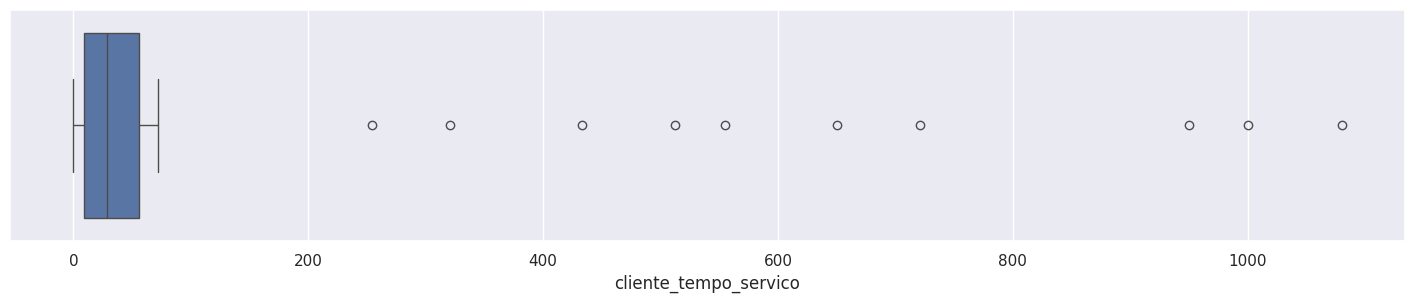

In [48]:
sns.set(rc={'figure.figsize':(18,3)})

a = sns.boxplot(x=df['cliente_tempo_servico'])

In [49]:
q1 = df.cliente_tempo_servico.quantile(.25)
q3 = df.cliente_tempo_servico.quantile(.75)
iqr = q3 - q1
lim_inf = q1 - (1.5 * iqr)
lim_sup = q3 + (1.5 * iqr)

print(f'int. interquartil:\t{iqr}\nlimite inferior:\t{lim_inf}\nlimite superior:\t{lim_sup}')

int. interquartil:	47.0
limite inferior:	-61.5
limite superior:	126.5


Agora selecionamos os candidatos a _outliers_ em nossos dados

In [50]:
idx_outliers = df.query(f'cliente_tempo_servico < {lim_inf} or cliente_tempo_servico > {lim_sup}').index.to_list()
df[(df['cliente_tempo_servico'] < lim_inf) | (df['cliente_tempo_servico'] > lim_sup)].cliente_tempo_servico

1945    1080.0
1946    1000.0
1952     950.0
1956     254.0
1958     321.0
1963     650.0
1966     721.0
1970     555.0
1973     433.0
1974     512.0
Name: cliente_tempo_servico, dtype: float64

#### Formas de identificar _outliers_

Existem várias técnicas para detectar _outliers_ em um conjunto de dados. Algumas das mais comuns são:

- _Z-score_
- regra dos 3 sigmas
- análise de dispersão.

##### **_Z-score_**

O _z-score_ é uma medida estatística que indica a quantos múltiplos do desvio-padrão um dado está distante da média. Para detectar _outliers_ utilizando essa medida, basta calcular o _z-score_ de cada dado e verificar se ele está muito distante da média. Se o _z-score_ for maior do que um determinado limite, podemos considerar esse dado como um _outlier_.

O limite geralmente utilizado é de 3 desvios-padrões, ou seja, se o _z-score_ de um dado for maior do que 3, podemos considerá-lo como um _outlier_.

In [51]:
import numpy as np

# Dados de exemplo
data = np.array([10, 20, 30, 40, 150, 50, 60, 70, 80, 90, 100, 350])

# Cálculo do z-score
z_scores = (data - np.mean(data)) / np.std(data)

# Limite para considerar um dado como outlier
limite = 3

# Identificação dos outliers
outliers = data[np.abs(z_scores) > limite]

print("Outliers encontrados:", outliers)

Outliers encontrados: [350]


##### **Regra dos 3 sigmas**

A regra dos 3 sigmas é uma técnica que utiliza a distribuição normal para identificar _outliers_. Ela diz que cerca de 99,7% dos dados estarão dentro de 3 desvios padrão da média. Portanto, se um dado estiver a mais de 3 desvios padrão da média, podemos considerá-lo como um _outlier_.

In [52]:
import numpy as np

# Criar um array com os dados
dados = np.array([0, 10, 12, 13, 15, 16, 18, 20, 22, 25, 30, 35, 40, 50, 350])

# Calcular a média e o desvio padrão do conjunto de dados
media = np.mean(dados)
desvio_padrao = np.std(dados)

# Definir o limite superior e inferior para identificar os outliers
limite_superior = media + (3 * desvio_padrao)
limite_inferior = media - (3 * desvio_padrao)

# Identificar os outliers no conjunto de dados
outliers = dados[(dados > limite_superior) | (dados < limite_inferior)]

print("Outliers:", outliers)

Outliers: [350]


##### **Análise de dispersão**

A análise de dispersão é uma técnica que utiliza gráficos para identificar _outliers_. Um gráfico comumente utilizado é o _boxplot_ que mostra a distribuição dos dados em quartis. Os _outliers_ são identificados como pontos fora dos limites superior e inferior do _boxplot_.

Outliers encontrados: [200]


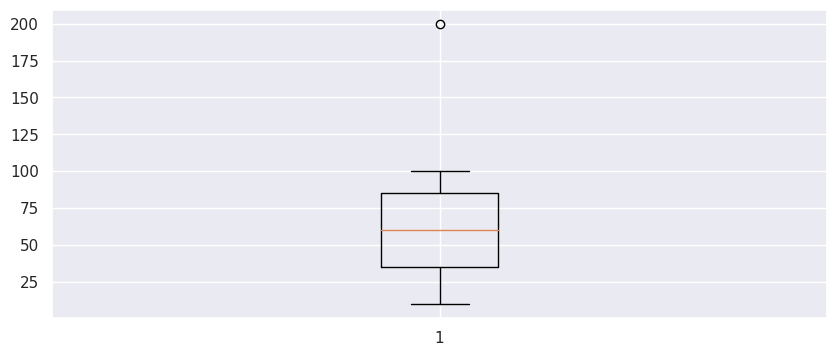

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo
data = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])

# Criação do boxplot
fig, ax = plt.subplots(figsize=(10,4))
ax.boxplot(data)

# Identificação dos outliers
outliers = data[(data < np.percentile(data, 25) - (1.5 * (np.percentile(data, 75) - np.percentile(data, 25)))) |
                (data > np.percentile(data, 75) + (1.5 * (np.percentile(data, 75) - np.percentile(data, 25))))]

print("Outliers encontrados:", outliers)

### Substituindo os _outliers_

Não podemos manter os _outliers_ em nossa base de dados pois o modelo de _machine learning_ irá aprender padrões incorretos e fazer predições equivocadas. Por exemplo, já identificamos contratos com mais de 80 anos, o que não faz sentido, ou seja, é um padrão totalmente incorreto dos dados.

Para a coluna `cliente_tempo_servico` vamos aproveitar a relação que ela possui com outras duas, `conta_cobranca_mensal` e `conta_cobranca_total`, para calcular um valor mais realista e substituir.

In [54]:
df.loc[idx_outliers, 'cliente_tempo_servico'] = np.ceil( df.loc[idx_outliers, 'conta_cobranca_total'] / df.loc[idx_outliers, 'conta_cobranca_mensal'] )
df.iloc[idx_outliers].cliente_tempo_servico

1945    1080.0
1946    1000.0
1952     951.0
1956       2.0
1958      43.0
1963     650.0
1966      44.0
1970       7.0
1973       4.0
1974       1.0
Name: cliente_tempo_servico, dtype: float64

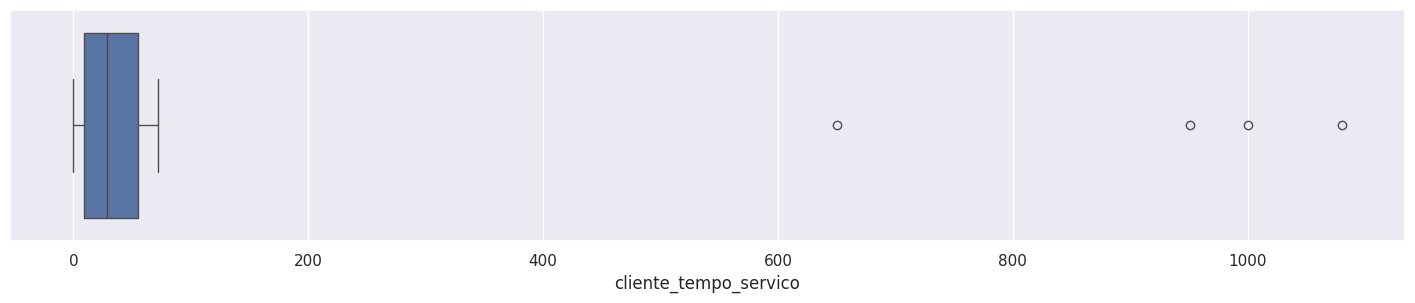

In [55]:
a = sns.boxplot(x=df['cliente_tempo_servico'])

Vemos que alguns valores permanecem "iguais", então vamos olhar os dados nas colunas relacionadas também

In [56]:
idx_outliers = df.query(f'cliente_tempo_servico < {lim_inf} or cliente_tempo_servico > {lim_sup}').index.to_list()
df.loc[idx_outliers, ['cliente_tempo_servico', 'conta_cobranca_mensal', 'conta_cobranca_total']]

,cliente_tempo_servico,conta_cobranca_mensal,conta_cobranca_total
1945,1080.0,103.9,112212.0
1946,1000.0,45.9,45900.0
1952,951.0,84.1,79895.0
1963,650.0,73.0,47450.0


conta_cobranca_total

int. interquartil:	3385.05
limite inferior:	-4679.025
limite superior:	8861.175


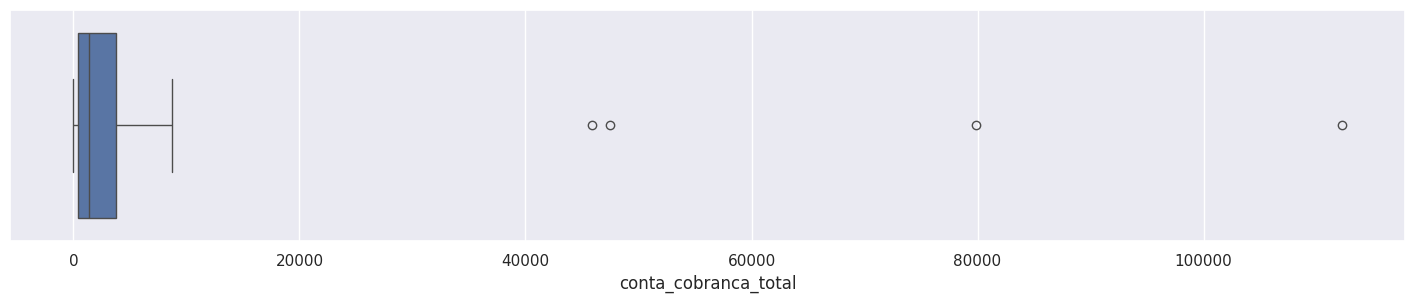

In [57]:
coluna_avaliada = 'conta_cobranca_total'

q1 = df[coluna_avaliada].quantile(.25)
q3 = df[coluna_avaliada].quantile(.75)
iqr = q3 - q1
lim_inf = q1 - (1.5 * iqr)
lim_sup = q3 + (1.5 * iqr)

print(f'{coluna_avaliada}\n\nint. interquartil:\t{round(iqr, 3)}\nlimite inferior:\t{lim_inf}\nlimite superior:\t{lim_sup}')

a = sns.boxplot(x=df[coluna_avaliada])

### Removendo _outliers_

De fato, o que acontece é que os dados, de ao menos uma das colunas relacionadas, também são _outliers_. Nesse caso, nos resta remover essas amostras de nossa base de dados.

In [58]:
df = df.drop(idx_outliers).reset_index(drop=True)
df.shape

(7002, 21)

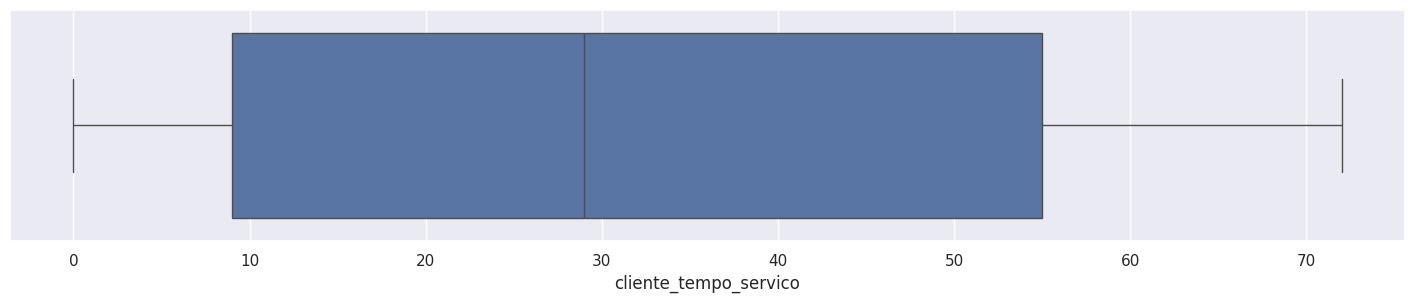

In [59]:
a = sns.boxplot(x=df['cliente_tempo_servico'])

## 5 Variáveis categóricas

As **variáveis categóricas** são um tipo de variável usado em Ciência de Dados para representar dados que podem ser classificados em diferentes categorias ou grupos, sem um valor numérico associado a elas. Por exemplo, se uma pessoa cientista de dados estiver analisando o desempenho acadêmico de estudantes em uma escola, ela pode usar variáveis categóricas para classificar o desempenho dessas pessoas em diferentes grupos, como "excelente", "bom" ou "regular". Isso permite identificar padrões ou tendências no desempenho.

Existem muitos exemplos de variáveis categóricas na Ciência de Dados. Algumas das mais comuns incluem a cor dos olhos, o tipo sanguíneo, a marca de um carro ou a escolaridade. Essas variáveis não possuem uma escala numérica e não podem ser medidas em termos de magnitude ou intensidade. Em vez disso, elas são usadas para classificar dados em diferentes grupos ou categorias. Dentre os tipos de variáveis, temos:

- **Variáveis categóricas nominais**

São aquelas que não possuem uma ordem ou hierarquia específica entre as categorias. Por exemplo, se uma pessoa cientista de dados estiver analisando a preferência musical de um grupo de pessoas, ela pode usar variáveis categóricas nominais para classificar as pessoas em diferentes grupos, como: "rock", "jazz" ou "pop".

- **Variáveis categóricas ordinais**

Possuem uma ordem específica entre as categorias. Por exemplo, se a pessoa cientista de dados estiver analisando a escolaridade de um grupo de pessoas, ela pode usar esse tipo de variável para classificar as pessoas em diferentes grupos, como: "ensino fundamental completo", "ensino médio completo" ou "ensino superior completo" e assim por diante.

- **Variáveis categóricas binárias**

São um tipo especial de variável categórica que possui apenas duas categorias possíveis, por exemplo: sim/não, verdadeiro/falso ou presente/ausente. As variáveis categóricas binárias são úteis porque permitem que cientistas de dados analisem a distribuição de dados em apenas duas categorias possíveis.


### Removendo dados

Um exemplo de variável categórico em nossa base de dados é a coluna `id_cliente`, que é um identificador único para cada uma das amostras, mas que não possui valor numérico com significado. Se inserirmos esse dado no modelo de _machine learning_, ele irá procurar algum padrão nessa coluna, o que pode prejudicar os resultados do modelo. Portanto, é uma variável que pode ser removida da base.

In [60]:
df.drop('id_cliente', axis=1, inplace=True)
df.head()

,churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,internet_seguranca_online,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamento_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_total
0,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.40
1,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
2,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
3,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.40
4,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,nao,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.4,571.45


### Substituindo valores - Variáveis categóricas binárias

Vamos modificar um código já utilizado nesse _notebook_ para encontrar as variáveis binárias e quais são seus valores possíveis, e dessa forma, substituir por valores adequados para o modelo de _machine learning_.

In [61]:
# encontra quais sao as colunas e os valores
binary_columns    = []
unique_bin_values = []

for col in df.columns:
    unique_values = list(df[col].unique())
    if len(unique_values) == 2:
        binary_columns.append(col)
        unique_bin_values += unique_values
        espacamento = '\t' * (1 if len(col) > 23 else ( 2 if len(col) > 15 else ( 3 if len(col) > 7 else 4)))
        print(f"{col}{espacamento}{unique_values}")

print('\n\nvariaveis binarias:', binary_columns, '\nvalores binarios:', set(unique_bin_values))

churn				['nao', 'sim']
cliente_genero			['masculino', 'feminino']
cliente_idoso			[0, 1]
cliente_parceiro		['nao', 'sim']
cliente_dependentes		['nao', 'sim']
telefone_servico_telefone	['sim', 'nao']
conta_faturamento_eletronico	['nao', 'sim']


variaveis binarias: ['churn', 'cliente_genero', 'cliente_idoso', 'cliente_parceiro', 'cliente_dependentes', 'telefone_servico_telefone', 'conta_faturamento_eletronico'] 
valores binarios: {0, 1, 'masculino', 'feminino', 'nao', 'sim'}


In [62]:
# define mapeamento para novos valores
new_bin_values = {'sim': 1, 'nao': 0, 'masculino': 1, 'feminino': 0}
new_bin_values

{'sim': 1, 'nao': 0, 'masculino': 1, 'feminino': 0}

In [63]:
# substitui os valores
df[binary_columns] = df[binary_columns].replace(new_bin_values)
df.head()

,churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,internet_seguranca_online,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamento_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_total
0,0,1,0,0,0,9.0,1,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,0,cheque pelo correio,59.9,542.40
1,1,1,0,0,0,4.0,1,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,1,cheque eletronico,73.9,280.85
2,1,1,1,1,0,13.0,1,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,1,cheque eletronico,98.0,1237.85
3,1,0,1,1,0,3.0,1,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,1,cheque pelo correio,83.9,267.40
4,0,0,0,0,1,9.0,1,nao,DSL,nao,nao,nao,sim,sim,sim,mes a mes,1,cartao de credito (automatico),69.4,571.45


In [64]:
# confere os valores possiveis nas colunas binarias
for col in df.columns:
    unique_values = list(df[col].unique())
    if len(unique_values) == 2:
        print(unique_values, col)

[0, 1] churn
[1, 0] cliente_genero
[0, 1] cliente_idoso
[0, 1] cliente_parceiro
[0, 1] cliente_dependentes
[1, 0] telefone_servico_telefone
[0, 1] conta_faturamento_eletronico


### Variáveis categóricas nominais - _One Hot Encoder (Dummy)_

Agora vamos voltar nossa atenção para variáveis categóricas que possuem mais de dois valores possíveis, não binárias, e as categorias não possuem uma ordem entre elas.

Para as variáveis categóricas nominais, utilizamos a técnica chamada de _One Hot Encoder_, ou também _Dummy_. Essa técnica substitui uma variável por outras N variáveis, sendo N o número de categorias da variável. Cada uma das novas variáveis atua com um _flag_ para sua categoria. Veja exemplo abaixo:

In [67]:
s = pd.Series(list('abcac'))
s

0    a
1    b
2    c
3    a
4    c
dtype: object

In [77]:
pd.get_dummies(s, dtype=int).add_prefix('categoria_')

,categoria_a,categoria_b,categoria_c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,0,0,1


In [73]:
pd.get_dummies(s, dtype=bool)

,a,b,c
0,True,False,False
1,False,True,False
2,False,False,True
3,True,False,False
4,False,False,True


Note que para cada valor na coluna `categoria`, existe uma combinação de valores nas colunas `categoria_N`.

In [80]:
label, dados = 'categoria', list('abcac')

pd.merge(
    pd.DataFrame({label: dados})
    ,pd.get_dummies(pd.Series(dados), dtype=int).add_prefix(f'{label}_')
    ,left_index=True, right_index=True
)

,categoria,categoria_a,categoria_b,categoria_c
0,a,1,0,0
1,b,0,1,0
2,c,0,0,1
3,a,1,0,0
4,c,0,0,1


Agora vamos utilizar essa técnica no nosso conjunto de dados, mas primeiro precisamos selecionar as colunas que vamos fazer essa transformação.

Nesse ponto, as colunas que ainda precisamos tratar são (provavelmente) do tipo _object_, então podemos modificar um código já usado nesse _notebook_ para selecionar as colunas que temos interesse nesse momento:

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7002 entries, 0 to 7001
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   churn                          7002 non-null   int64  
 1   cliente_genero                 7002 non-null   int64  
 2   cliente_idoso                  7002 non-null   int64  
 3   cliente_parceiro               7002 non-null   int64  
 4   cliente_dependentes            7002 non-null   int64  
 5   cliente_tempo_servico          7002 non-null   float64
 6   telefone_servico_telefone      7002 non-null   int64  
 7   telefone_varias_linhas         7002 non-null   object 
 8   internet_servico_internet      7002 non-null   object 
 9   internet_seguranca_online      7002 non-null   object 
 10  internet_backup_online         7002 non-null   object 
 11  internet_protecao_dispositivo  7002 non-null   object 
 12  internet_suporte_tecnico       7002 non-null   o

In [94]:
nomical_categorical_col = []
qtt_new_col             = 0

for col in df.columns:
    unique_values = list(df[col].unique())
    if len(unique_values) > 2 and df[col].dtypes == 'object':
        nomical_categorical_col.append(col)
        qtt_new_col += len(unique_values)
        espacamento = '\t' * (1 if len(col) > 23 else ( 2 if len(col) > 15 else ( 3 if len(col) > 7 else 4)))
        print(f"{col}{espacamento}{len(unique_values)} {unique_values}")

print(f"\ntotal de categorias: {qtt_new_col}\nvariaveis categóricas nominais: {len(nomical_categorical_col)}\n{nomical_categorical_col}")

telefone_varias_linhas		3 ['sim', 'nao', 'sem servico de telefone']
internet_servico_internet	3 ['DSL', 'fibra otica', 'nao']
internet_seguranca_online	3 ['nao', 'sim', 'sem servico de internet']
internet_backup_online		3 ['nao', 'sim', 'sem servico de internet']
internet_protecao_dispositivo	3 ['nao', 'sim', 'sem servico de internet']
internet_suporte_tecnico	3 ['nao', 'sim', 'sem servico de internet']
internet_tv_streaming		3 ['nao', 'sim', 'sem servico de internet']
internet_filmes_streaming	3 ['sim', 'nao', 'sem servico de internet']
conta_contrato			3 ['mes a mes', 'dois anos', 'um ano']
conta_metodo_pagamento		4 ['cheque pelo correio', 'cheque eletronico', 'cartao de credito (automatico)', 'transferencia bancaria (automatica)']

total de categorias: 31
variaveis categóricas nominais: 10
['telefone_varias_linhas', 'internet_servico_internet', 'internet_seguranca_online', 'internet_backup_online', 'internet_protecao_dispositivo', 'internet_suporte_tecnico', 'internet_tv_streaming',

In [92]:
# seleciona apenas as colunas que devem ser transformadas
df[nomical_categorical_col]

,telefone_varias_linhas,internet_servico_internet,internet_seguranca_online,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_metodo_pagamento
0,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,cheque pelo correio
1,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,cheque eletronico
2,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,cheque eletronico
3,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,cheque pelo correio
4,nao,DSL,nao,nao,nao,sim,sim,sim,mes a mes,cartao de credito (automatico)
...,...,...,...,...,...,...,...,...,...,...
6997,nao,DSL,sim,nao,nao,sim,nao,nao,um ano,cheque pelo correio
6998,sim,fibra otica,nao,nao,nao,nao,nao,sim,mes a mes,cheque eletronico
6999,nao,DSL,nao,sim,nao,nao,nao,nao,mes a mes,cheque pelo correio
7000,nao,DSL,sim,nao,sim,sim,nao,sim,dois anos,cheque pelo correio


In [95]:
# transforma colunas selecionadas
pd.get_dummies(df[nomical_categorical_col], dtype=int)

,telefone_varias_linhas_nao,telefone_varias_linhas_sem servico de telefone,telefone_varias_linhas_sim,internet_servico_internet_DSL,internet_servico_internet_fibra otica,internet_servico_internet_nao,internet_seguranca_online_nao,internet_seguranca_online_sem servico de internet,internet_seguranca_online_sim,internet_backup_online_nao,...,internet_filmes_streaming_nao,internet_filmes_streaming_sem servico de internet,internet_filmes_streaming_sim,conta_contrato_dois anos,conta_contrato_mes a mes,conta_contrato_um ano,conta_metodo_pagamento_cartao de credito (automatico),conta_metodo_pagamento_cheque eletronico,conta_metodo_pagamento_cheque pelo correio,conta_metodo_pagamento_transferencia bancaria (automatica)
0,0,0,1,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
1,1,0,0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0
2,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3,1,0,0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
4,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,1,0,0,1,0,0,0,0,1,1,...,1,0,0,0,0,1,0,0,1,0
6998,0,0,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
6999,1,0,0,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
7000,1,0,0,1,0,0,0,0,1,1,...,0,0,1,1,0,0,0,0,1,0


Podemos aplicar diretamente o DataFrame completo (sem selecionar) que apenas as variáveis não numéricas serão transformadas.

In [98]:
# transforma todas as colunas categorias nominais e armazena resultado
df = pd.get_dummies(df, dtype=int)

In [106]:
df.columns

Index(['churn', 'cliente_genero', 'cliente_idoso', 'cliente_parceiro',
       'cliente_dependentes', 'cliente_tempo_servico',
       'telefone_servico_telefone', 'conta_faturamento_eletronico',
       'conta_cobranca_mensal', 'conta_cobranca_total',
       'telefone_varias_linhas_nao',
       'telefone_varias_linhas_sem servico de telefone',
       'telefone_varias_linhas_sim', 'internet_servico_internet_DSL',
       'internet_servico_internet_fibra otica',
       'internet_servico_internet_nao', 'internet_seguranca_online_nao',
       'internet_seguranca_online_sem servico de internet',
       'internet_seguranca_online_sim', 'internet_backup_online_nao',
       'internet_backup_online_sem servico de internet',
       'internet_backup_online_sim', 'internet_protecao_dispositivo_nao',
       'internet_protecao_dispositivo_sem servico de internet',
       'internet_protecao_dispositivo_sim', 'internet_suporte_tecnico_nao',
       'internet_suporte_tecnico_sem servico de internet',
     

In [107]:
# da aquela ajeitadinha nos rotulos das colunas
df.columns = df.columns.str.replace('(\()|(\))', '', regex=True).str.replace(' ', '_')
df.columns

Index(['churn', 'cliente_genero', 'cliente_idoso', 'cliente_parceiro',
       'cliente_dependentes', 'cliente_tempo_servico',
       'telefone_servico_telefone', 'conta_faturamento_eletronico',
       'conta_cobranca_mensal', 'conta_cobranca_total',
       'telefone_varias_linhas_nao',
       'telefone_varias_linhas_sem_servico_de_telefone',
       'telefone_varias_linhas_sim', 'internet_servico_internet_DSL',
       'internet_servico_internet_fibra_otica',
       'internet_servico_internet_nao', 'internet_seguranca_online_nao',
       'internet_seguranca_online_sem_servico_de_internet',
       'internet_seguranca_online_sim', 'internet_backup_online_nao',
       'internet_backup_online_sem_servico_de_internet',
       'internet_backup_online_sim', 'internet_protecao_dispositivo_nao',
       'internet_protecao_dispositivo_sem_servico_de_internet',
       'internet_protecao_dispositivo_sim', 'internet_suporte_tecnico_nao',
       'internet_suporte_tecnico_sem_servico_de_internet',
     

In [110]:
# aquela "conferidazinha" nos tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7002 entries, 0 to 7001
Data columns (total 41 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   churn                                                     7002 non-null   int64  
 1   cliente_genero                                            7002 non-null   int64  
 2   cliente_idoso                                             7002 non-null   int64  
 3   cliente_parceiro                                          7002 non-null   int64  
 4   cliente_dependentes                                       7002 non-null   int64  
 5   cliente_tempo_servico                                     7002 non-null   float64
 6   telefone_servico_telefone                                 7002 non-null   int64  
 7   conta_faturamento_eletronico                              7002 non-null   int64  
 8   conta_cobranca_men

In [108]:
# e pronto! pode usar a base pra fazer um modelo de ml
df.head()

,churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,conta_faturamento_eletronico,conta_cobranca_mensal,conta_cobranca_total,...,internet_filmes_streaming_nao,internet_filmes_streaming_sem_servico_de_internet,internet_filmes_streaming_sim,conta_contrato_dois_anos,conta_contrato_mes_a_mes,conta_contrato_um_ano,conta_metodo_pagamento_cartao_de_credito_automatico,conta_metodo_pagamento_cheque_eletronico,conta_metodo_pagamento_cheque_pelo_correio,conta_metodo_pagamento_transferencia_bancaria_automatica
0,0,1,0,0,0,9.0,1,0,59.9,542.40,...,0,0,1,0,1,0,0,0,1,0
1,1,1,0,0,0,4.0,1,1,73.9,280.85,...,1,0,0,0,1,0,0,1,0,0
2,1,1,1,1,0,13.0,1,1,98.0,1237.85,...,0,0,1,0,1,0,0,1,0,0
3,1,0,1,1,0,3.0,1,1,83.9,267.40,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,9.0,1,1,69.4,571.45,...,0,0,1,0,1,0,1,0,0,0
